Nama    : Muhammad Endar Darmawan
Kelas   : TI - 3F
Absen   : 21
NIM     : 2141720160

# Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

# Tentang Dataset MNIST
Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

# Detail Kuis
1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
    - Anda diperbolehkan untuk melakukan tunning parameter.
    - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
    - Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
    - Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
    - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Jawaban

In [1]:
#import library #

# untuk manipulasi data
import pandas as pd

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# untuk pre-processing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

# untuk model SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

c:\Users\adien\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## No 1

label  jumlah data
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958


C:\Users\adien\AppData\Local\Temp\ipykernel_28332\732428327.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in label_counts.iteritems():


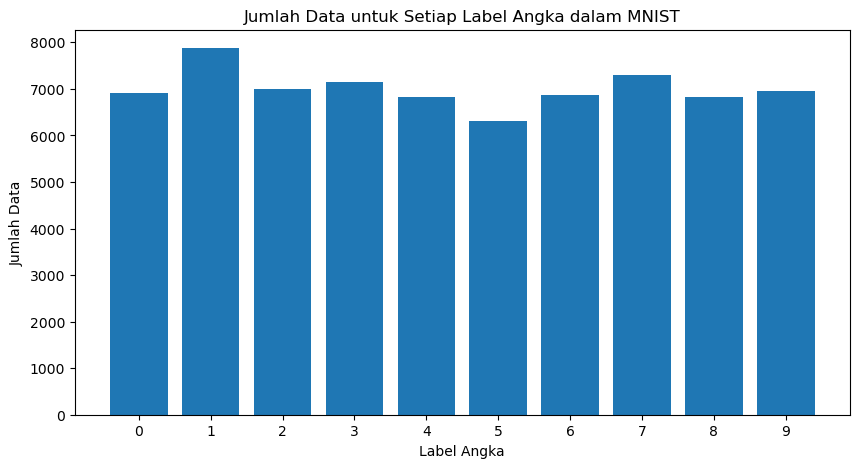

In [3]:
# Ambil target (label) dan ubah ke dalam bentuk DataFrame
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df['target'] = mnist.target

# Hitung jumlah data setiap label
label_counts = df['target'].value_counts().sort_index()

# Tampilkan hasil perhitungan dengan label dan "jumlah data" dalam format yang diinginkan
print("label  jumlah data")
for label, count in label_counts.iteritems():
    print(f"{label}      {count}")

# Menampilkan visualisasi jumlah data untuk setiap label angka
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.xticks(range(10))
plt.title('Jumlah Data untuk Setiap Label Angka dalam MNIST')
plt.show()

**Penjelasan**

Berdasarakan

## No 2

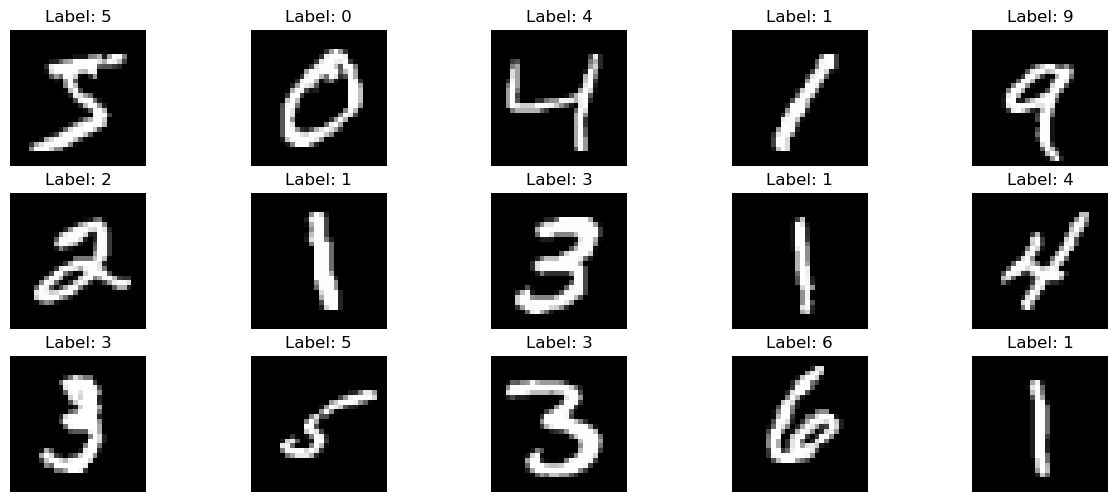

In [4]:
import matplotlib.pyplot as plt

# Mengambil 15 citra pertama dan labelnya
images = mnist.data[:15].to_numpy(dtype=int)
labels = mnist.target[:15]

# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = images.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(15, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show()

**Penjelasan**
sds

## No 4

In [7]:
X = mnist.data.to_numpy(dtype=int)
y = mnist.target

# Standard scaling to normalize pixel values
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

NameError: name 'MinMaxScaler' is not defined

- **Data Training dan Testing dengan Rasio 70:30**

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Split the data into training (70%) and testing (30%) sets
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

print("Rasio 70:30")
print("Data Training:", X_train_70.shape, y_train_70.shape)
print("Data Testing:", X_test_30.shape, y_test_30.shape)
print("")

NameError: name 'X_normalized' is not defined

## Soal 3

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

# No 3
# Initialize and train PCA model
pca = PCA(n_components=150, whiten=True, random_state=42)

# Rasio 70:30
X_train_70_pca = pca.fit_transform(X_train_70)
X_test_30_pca = pca.transform(X_test_30)

# Rasio 80:20
X_train_80_pca = pca.fit_transform(X_train_80)
X_test_20_pca = pca.transform(X_test_20)

# Rasio 90:10
X_train_90_pca = pca.fit_transform(X_train_90)
X_test_10_pca = pca.transform(X_test_10)